## Install Dependencies

In [ ]:
!pip install -U transformers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cache

In [ ]:
!pip install accelerate

## Download Qwen2-7B-Instruct

In [ ]:
import transformers
import torch

model_id = "unsloth/Qwen2-7B-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/5.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

## Query Qwen2-7B-Instruct

In [ ]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """What is the meaning of life?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

# Replace the invalid "<|eot_id|>" token with the correct EOS token
terminators = [
    pipeline.tokenizer.eos_token_id,
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators, # Pass the list of terminators
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

The meaning of life is a question that has puzzled humans for centuries, and there is no single answer that satisfies everyone. Different people have different beliefs and perspectives on what the meaning of life is. Some believe it is to seek happiness and fulfillment, while others believe it is to serve a higher power or contribute to society. Ultimately, the meaning of life is a personal question that each individual must answer for themselves based on their own experiences, values, and beliefs.


In [ ]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """How can I learn Software Architecture?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

Learning software architecture involves understanding how to design and structure software systems. Here are some steps and resources to help you get started:

### 1. **Understand the Basics**
   - **Computer Science Fundamentals**: Refresh your knowledge of data structures, algorithms, and basic programming concepts.
   - **Software Engineering Principles**: Familiarize yourself with methodologies like Agile, Scrum, and Waterfall.

### 2. **Study Architecture Patterns**
   - **Learn Common Patterns**: Understand patterns like MVC (Model-View-Controller), Microservices, Layered Architectures, etc.
   - **Read Books**: "The Art of Computer Programming" by Donald Knuth offers insights into algorithms and data structures, while "Clean Code" by Robert C. Martin focuses on code organization.
   - **Online Courses**: Websites like Coursera, Udemy, or Pluralsight offer courses specifically on software architecture.

### 3. **Explore Architectural Styles**
   - **Monolithic vs Microservices**:

## Build a Chat App

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existin

In [ ]:
import gradio as gr

messages = []

def add_text(history, text):
    global messages  #message[list] is defined globally
    history = history + [(text,'')]
    messages = messages + [{"role":'user', 'content': text}]
    return history, ''

def generate(history):
  global messages
  prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

  terminators = [
    pipeline.tokenizer.eos_token_id,
]

  outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
  response_msg = outputs[0]["generated_text"][len(prompt):]
  for char in response_msg:
      history[-1][1] += char
      yield history
  pass

with gr.Blocks() as demo:

    chatbot = gr.Chatbot(value=[], elem_id="chatbot")
    with gr.Row():
            txt = gr.Textbox(
                show_label=False,
                placeholder="Enter text and press enter",
            )

    txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
            generate, inputs =[chatbot,],outputs = chatbot,)

demo.queue()
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0fb86df37abca722e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0fb86df37abca722e1.gradio.live


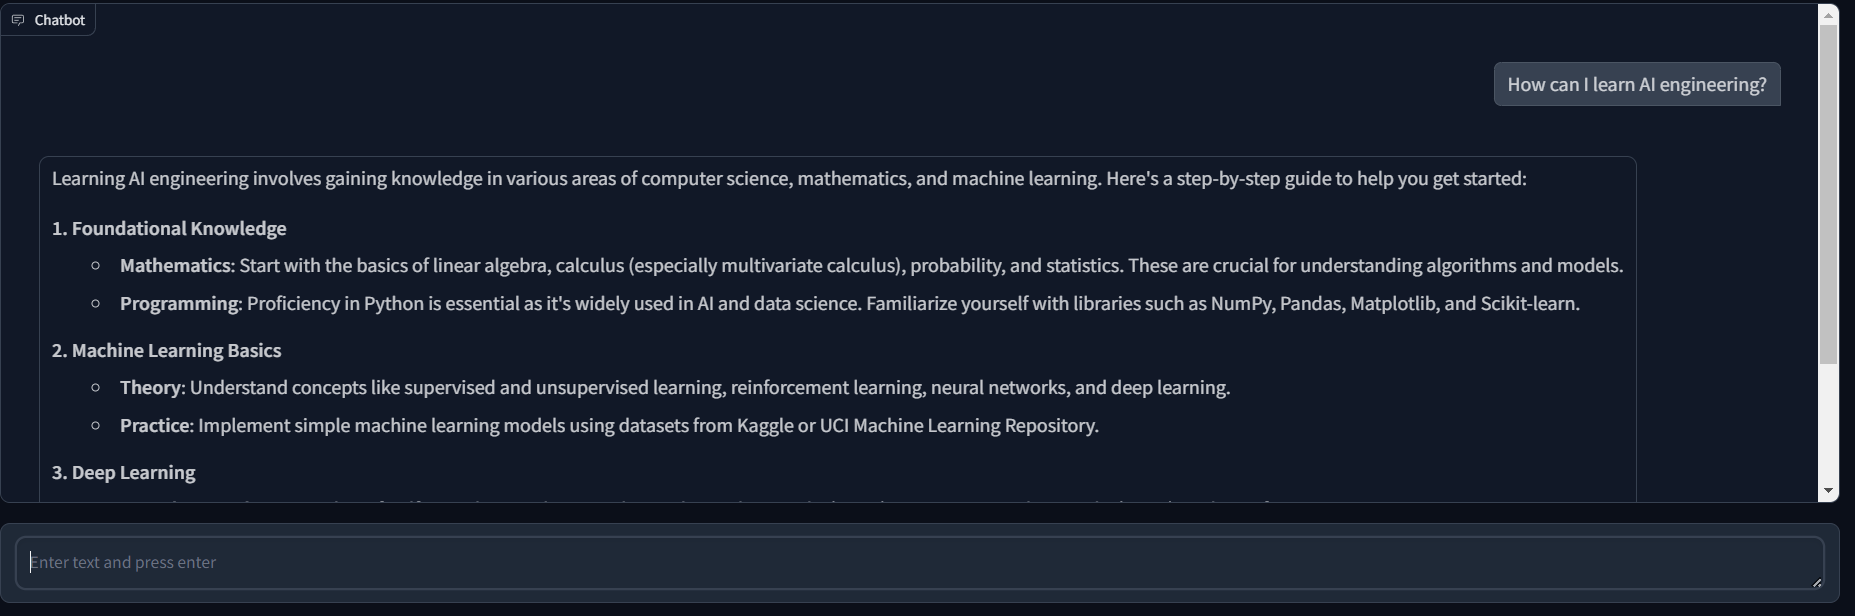

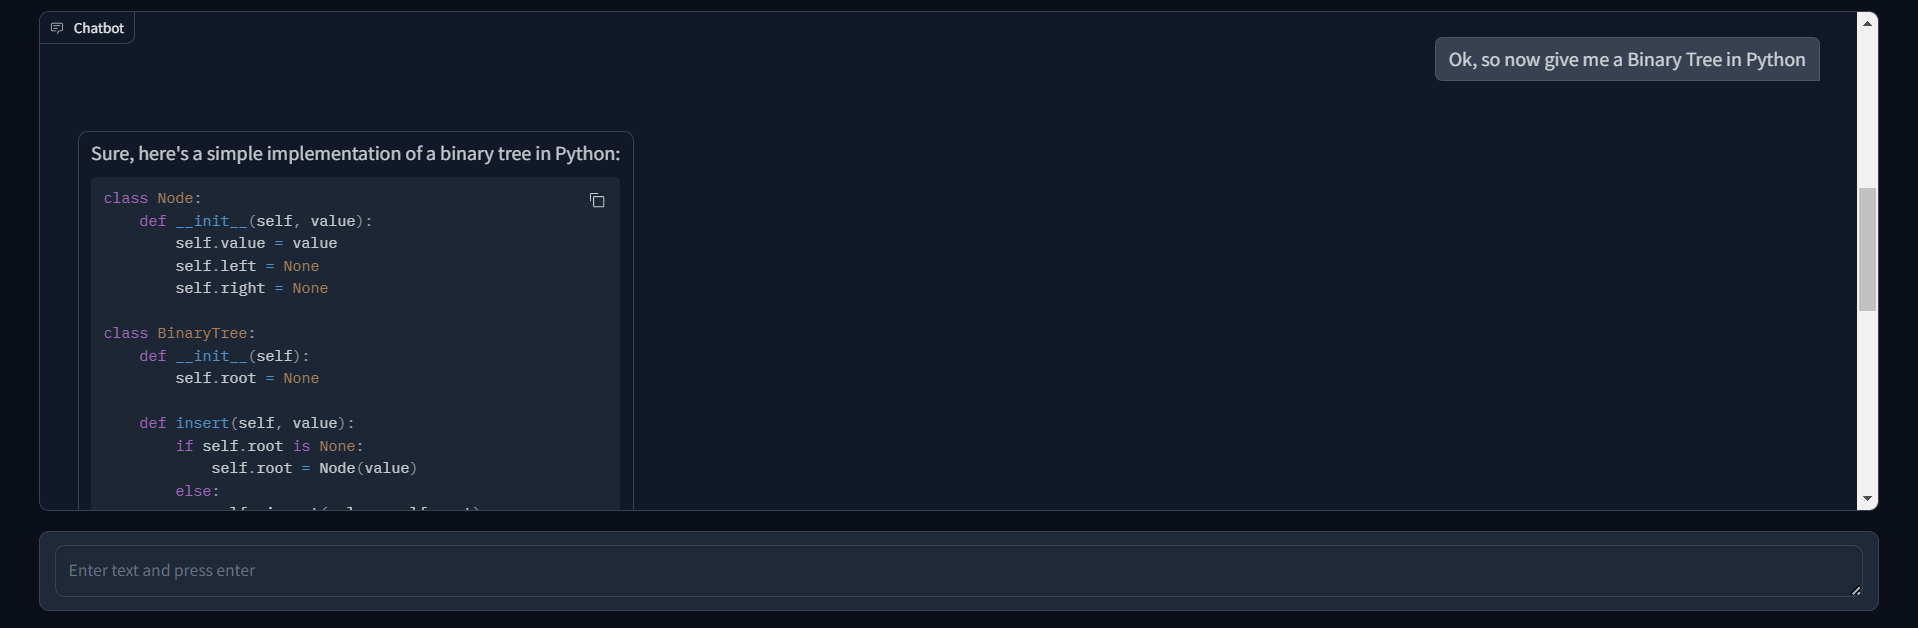